In [12]:
pip install matplotlib

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [14]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X, y = data.data, data.target

In [15]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the features for better model training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Create and train the baseline logistic regression model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

In [19]:
# Evaluate the baseline model's performance
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy:", baseline_accuracy)

Baseline Model Accuracy: 0.9736842105263158


In [20]:
# Create and train the logistic regression model with L2-Norm regularization (C=1.0 by default)
l2_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
l2_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_l2 = l2_model.predict(X_test)

In [21]:
# Evaluate the L2-Norm regularized model's performance
l2_accuracy = accuracy_score(y_test, y_pred_l2)
print("L2-Norm Regularized Model Accuracy:", l2_accuracy)

L2-Norm Regularized Model Accuracy: 0.9736842105263158


In [22]:
# Split the dataset into training, validation, and testing sets (60% training, 20% validation, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
# Standardize the features for better model training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [24]:
# Create and train the logistic regression model with early stopping
early_stopping_model = LogisticRegression(max_iter=1000, random_state=42)

val_accuracies = []
best_val_accuracy = 0.0
best_model = None
for epoch in range(1000):  # You can adjust the number of epochs
    early_stopping_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred_val = early_stopping_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_accuracies.append(val_accuracy)

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model = early_stopping_model
    else:
        # If validation accuracy didn't improve, stop training
        break

# Make predictions on the test set using the best model obtained from early stopping
y_pred_test = best_model.predict(X_test)

In [25]:
# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Early Stopping Model Accuracy:", test_accuracy)

Early Stopping Model Accuracy: 0.9736842105263158


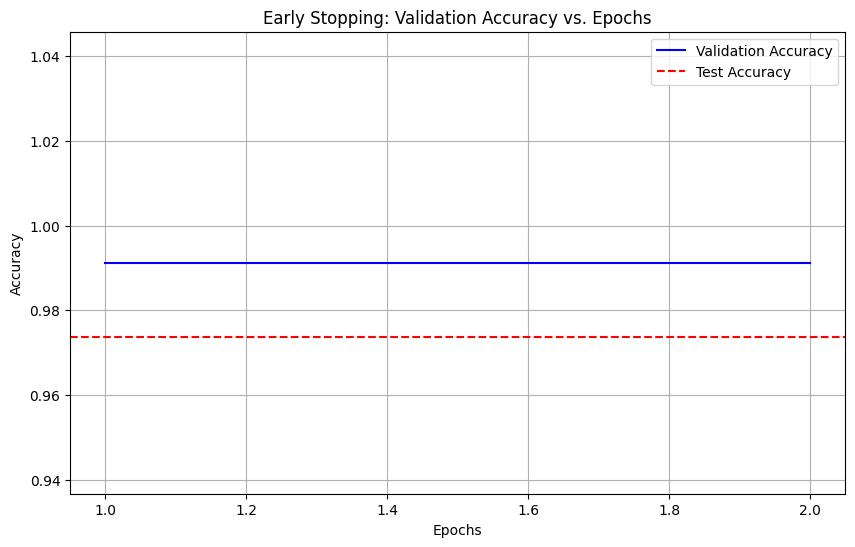

In [26]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
epochs = range(1, len(val_accuracies) + 1)
plt.plot(epochs, val_accuracies, 'b', label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Early Stopping: Validation Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()